In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from skimage.morphology import skeletonize
from skimage import measure, morphology
from skimage.filters import threshold_otsu

In [77]:
df1 = pd.read_csv('with.csv')


In [78]:

grouped = df1.groupby('TimeStep')
timestep_400_data = grouped.get_group(400)
phi_1 = timestep_400_data['Phi'].values
x_1 = timestep_400_data[':0'].values
y_1 = timestep_400_data[':1'].values

In [79]:
condition = (y_1 > 450) & (y_1 < 700)
phi_1 = phi_1[condition]
x_1 = x_1[condition]
y_1 = y_1[condition]
phi_binary = (phi_1 > 0).astype(int)


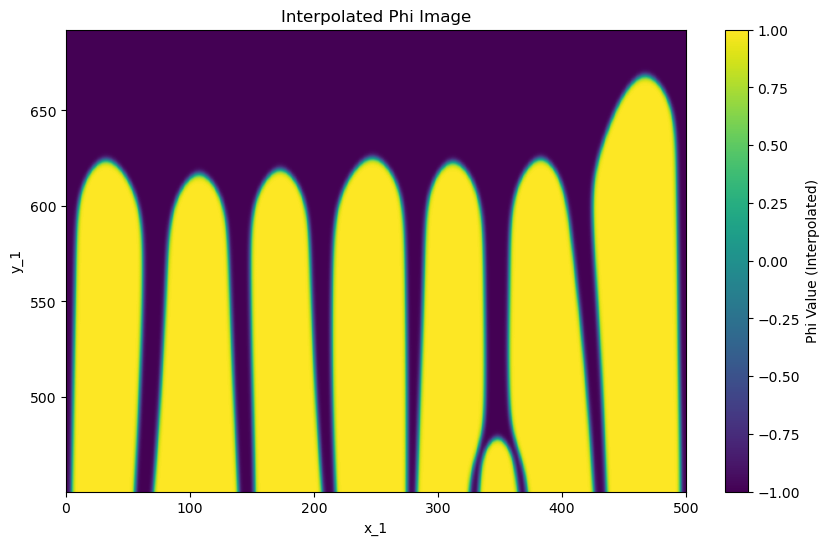

In [80]:
grid_x, grid_y = np.linspace(x_1.min(), x_1.max(), 500), np.linspace(y_1.min(), y_1.max(), 500)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_phi = griddata((x_1, y_1), phi_1, (grid_x, grid_y), method='linear')
# Plot the interpolated image
plt.figure(figsize=(10, 6))
plt.imshow(grid_phi, extent=(x_1.min(), x_1.max(), y_1.min(), y_1.max()),
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Phi Value (Interpolated)')
plt.xlabel('x_1')
plt.ylabel('y_1')
plt.title('Interpolated Phi Image')
plt.show()

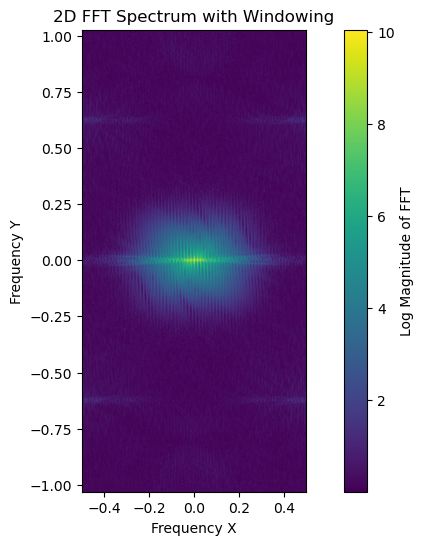

Estimated PDAS using Refined FFT: 242.475


In [ ]:
# Frequency space
dx = grid_x[0, 1] - grid_x[0, 0]  # Grid spacing in x
dy = grid_y[1, 0] - grid_y[0, 0]  # Grid spacing in y


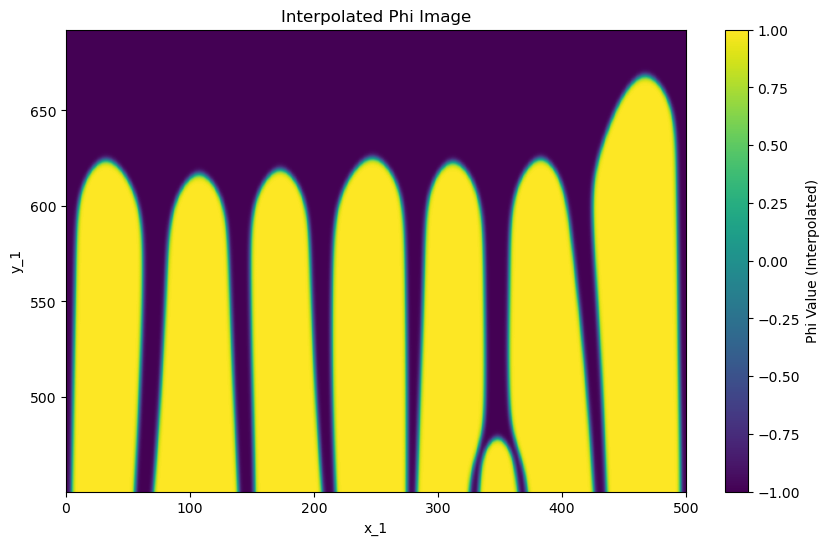

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(grid_phi, extent=(x_1.min(), x_1.max(), y_1.min(), y_1.max()),
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Phi Value (Interpolated)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phi(order parameter)')
plt.show()

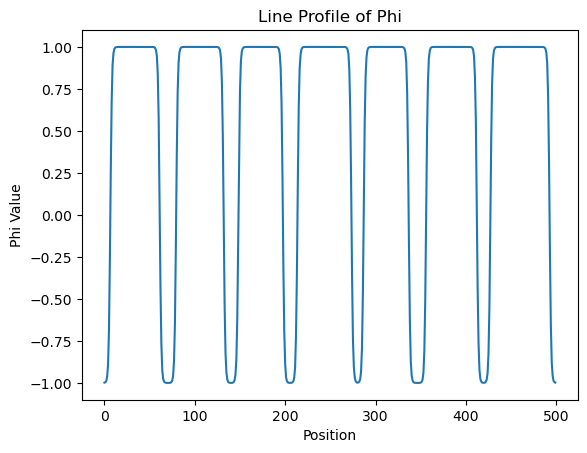

In [83]:
target_y = 550
row_index = np.argmin(np.abs(grid_y[:, 0] - target_y))  # Closest row to y = 550

# Extract the line profile from the selected row
line_profile = grid_phi[row_index, :]
plt.plot(line_profile)
plt.title("Line Profile of Phi")
plt.xlabel("Position")
plt.ylabel("Phi Value")
plt.show()

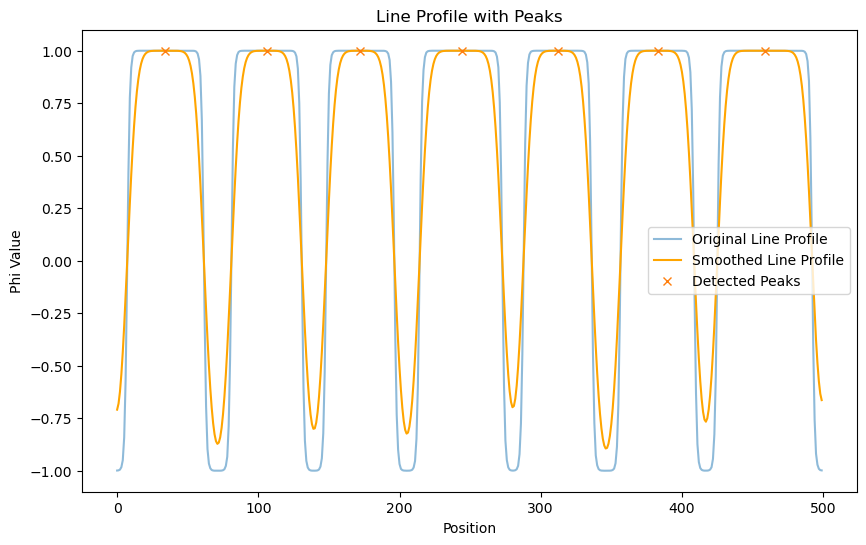

Average spacing between peaks (grid points): 70.83
Average spacing in physical units: 70.98


In [84]:


from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter

# Extract the line profile
line_profile = grid_phi[grid_phi.shape[0] // 2, :]  # Central row of the grid

# Smooth the line profile to reduce noise
smoothed_profile = gaussian_filter(line_profile, sigma=5)

# Find peaks in the smoothed line profile
# Set a minimum distance based on the expected dendrite spacing
expected_min_spacing = 20  # Adjust this based on your data
peaks, _ = find_peaks(smoothed_profile, height=0, distance=expected_min_spacing)

# Plot the smoothed line profile with peaks marked
plt.figure(figsize=(10, 6))
plt.plot(line_profile, label='Original Line Profile', alpha=0.5)
plt.plot(smoothed_profile, label='Smoothed Line Profile', color='orange')
plt.plot(peaks, smoothed_profile[peaks], "x", label='Detected Peaks')
plt.title("Line Profile with Peaks")
plt.xlabel("Position")
plt.ylabel("Phi Value")
plt.legend()
plt.show()

# Calculate average spacing between peaks
peak_distances = np.diff(peaks)
average_spacing = np.mean(peak_distances)
print(f"Average spacing between peaks (grid points): {average_spacing:.2f}")

# Convert to physical units
spacing_physical = average_spacing * dx
print(f"Average spacing in physical units: {spacing_physical:.2f}")



In [85]:
# Calculate the distances between consecutive peaks
peak_distances = np.diff(peaks)

# Average spacing between peaks
average_spacing = np.mean(peak_distances)

print(f"Average spacing between peaks: {average_spacing:.2f} grid points")


Average spacing between peaks: 70.83 grid points


In [86]:
spacing_physical = average_spacing * dx

print(spacing_physical)

70.9752839011356
